In [109]:
!pip install pandas
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Filename : rfcmodel.py

Libraries required for the model

Importing the extract_features function from the custom made module named : features_extract in the same directory

In [110]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from features_extract import extract_features
from joblib import dump, load
from sklearn.metrics import accuracy_score, confusion_matrix


Loadind the dataset generated from features_extract.py

In [111]:
df = pd.read_csv('url_dataset.csv')
df.head()

,UsingIp,longUrl,shortUrl,symbol,redirecting,prefixSuffix,SubDomains,Https,hasSsl,DomainRegLen,...,InfoEmail,AbnormalURL,WebsiteForwarding,DisableRightClick,UsingPopupWindow,AgeofDomain,DNSRecording,LinksPointingToPage,label,Url
0,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,https://google.com
1,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,https://facebook.com
2,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,https://youtube.com
3,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,https://twitter.com
4,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,https://instagram.com


Lists the shape of the data ie rows and columns

In [112]:
df.shape

(4142, 24)

Get more details of the columns of csv

In [113]:
df.columns

Index(['UsingIp', 'longUrl', 'shortUrl', 'symbol', 'redirecting',
       'prefixSuffix', 'SubDomains', 'Https', 'hasSsl', 'DomainRegLen',
       'Favicon', 'NonStdPort', 'Dots', 'Redirection //', 'InfoEmail',
       'AbnormalURL', 'WebsiteForwarding', 'DisableRightClick',
       'UsingPopupWindow', 'AgeofDomain', 'DNSRecording',
       'LinksPointingToPage', 'label', 'Url'],
      dtype='object')

List the Dtype of columns

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4142 entries, 0 to 4141
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   UsingIp              4142 non-null   int64 
 1   longUrl              4142 non-null   int64 
 2   shortUrl             4142 non-null   int64 
 3   symbol               4142 non-null   int64 
 4   redirecting          4142 non-null   int64 
 5   prefixSuffix         4142 non-null   int64 
 6   SubDomains           4142 non-null   int64 
 7   Https                4142 non-null   int64 
 8   hasSsl               4142 non-null   int64 
 9   DomainRegLen         4142 non-null   int64 
 10  Favicon              4142 non-null   int64 
 11  NonStdPort           4142 non-null   int64 
 12  Dots                 4142 non-null   int64 
 13  Redirection //       4142 non-null   int64 
 14  InfoEmail            4142 non-null   int64 
 15  AbnormalURL          4142 non-null   int64 
 16  Websit

Descriptive statistics of the dataset

In [115]:
df.describe()

,UsingIp,longUrl,shortUrl,symbol,redirecting,prefixSuffix,SubDomains,Https,hasSsl,DomainRegLen,...,Redirection //,InfoEmail,AbnormalURL,WebsiteForwarding,DisableRightClick,UsingPopupWindow,AgeofDomain,DNSRecording,LinksPointingToPage,label
count,4142.000000,4142.000000,4142.000000,4142.000000,4142.000000,4142.000000,4142.000000,4142.000000,4142.000000,4142.000000,...,4142.000000,4142.000000,4142.000000,4142.000000,4142.000000,4142.000000,4142.000000,4142.000000,4142.000000,4142.00000
mean,0.002897,0.226219,0.048044,0.005311,0.594882,0.258088,0.130130,0.942298,0.452438,-0.240222,...,0.006277,0.004829,0.189281,0.485756,0.017141,0.033800,-0.261709,-0.000966,0.626509,0.50000
std,0.053754,0.418433,0.213886,0.072695,0.737483,0.437635,0.405486,0.233206,0.509303,0.548093,...,0.098082,0.069328,0.391779,0.502267,0.142241,0.189859,0.520599,0.031065,0.488261,0.50006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.50000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000


Plotting the data distribution

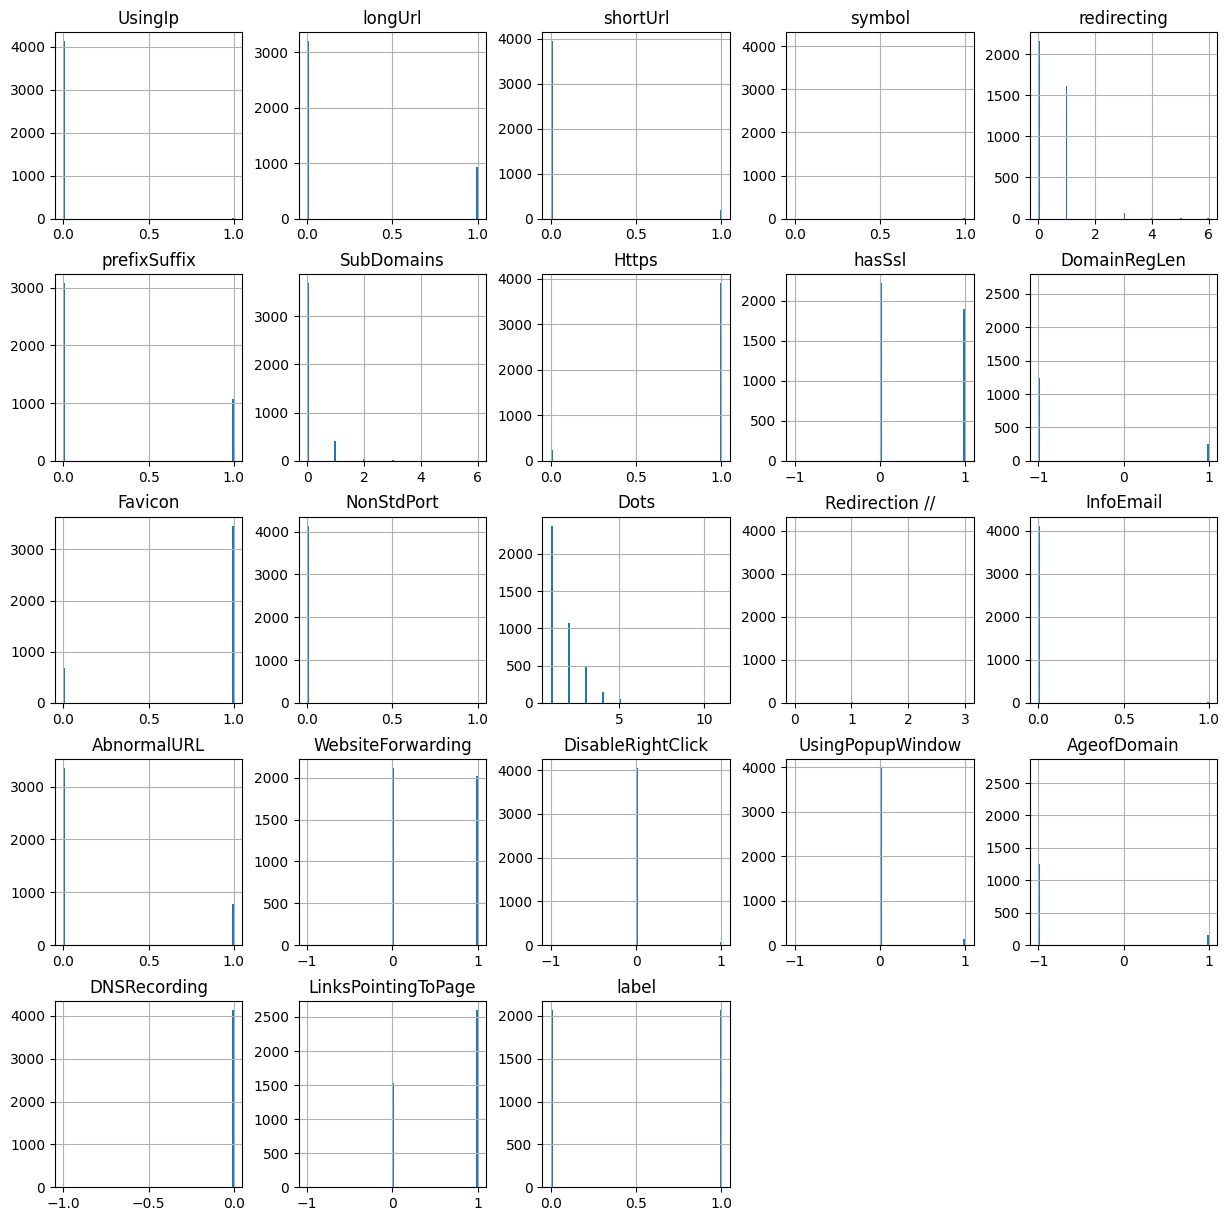

In [116]:
df.hist(bins = 100,figsize = (15,15))
plt.show()

 Drop the 'Url' column, since the dtype of it is object and from now on we only need the int64 for training.

In [117]:
df = df.drop(columns=['Url'])

Correlation heatmap

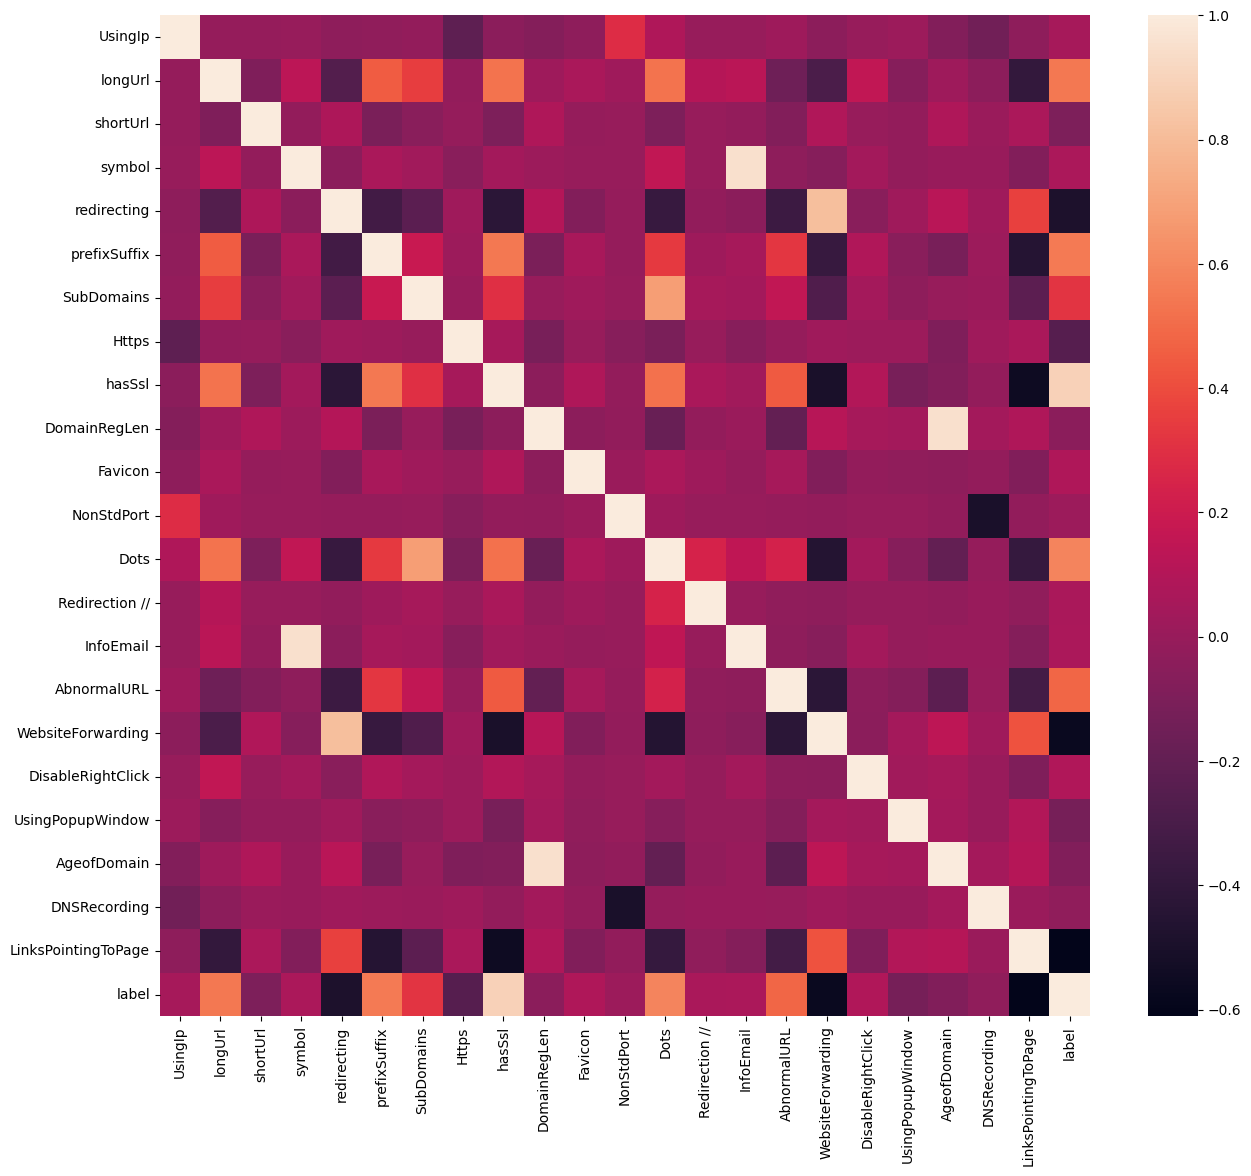

In [118]:
plt.figure(figsize=(15,13))
sns.heatmap(df.corr())
plt.show()

Checking the data for null or missing values

In [119]:
df.isnull().sum()

UsingIp                0
longUrl                0
shortUrl               0
symbol                 0
redirecting            0
prefixSuffix           0
SubDomains             0
Https                  0
hasSsl                 0
DomainRegLen           0
Favicon                0
NonStdPort             0
Dots                   0
Redirection //         0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
DisableRightClick      0
UsingPopupWindow       0
AgeofDomain            0
DNSRecording           0
LinksPointingToPage    0
label                  0
dtype: int64

Replace -1 with NaN (assuming -1 denotes failure to retrieve feature)

In [120]:
df = df.replace(-1, pd.NA)

Handle missing values (you might want to use a different strategy)

In [121]:
df = df.dropna()

Defining the feature and target variables

In [122]:
X = df.drop(columns=['label'])
y = df['label']

Define the weights for each feature

In [123]:
# feature_weights = {'AbnormalURL': 1.0, 'hasSsl': 2.0, 'NonStdPort': 1.9, 'longUrl':1.5, 'Dots': 0.5}
# for feature, weight in feature_weights.items():
#     X[feature] = X[feature] * weight

Spliting the data into training and testing sets

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Standardizing the features

In [125]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Defining and training of classifier

In [126]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Generating the feature importance in the model

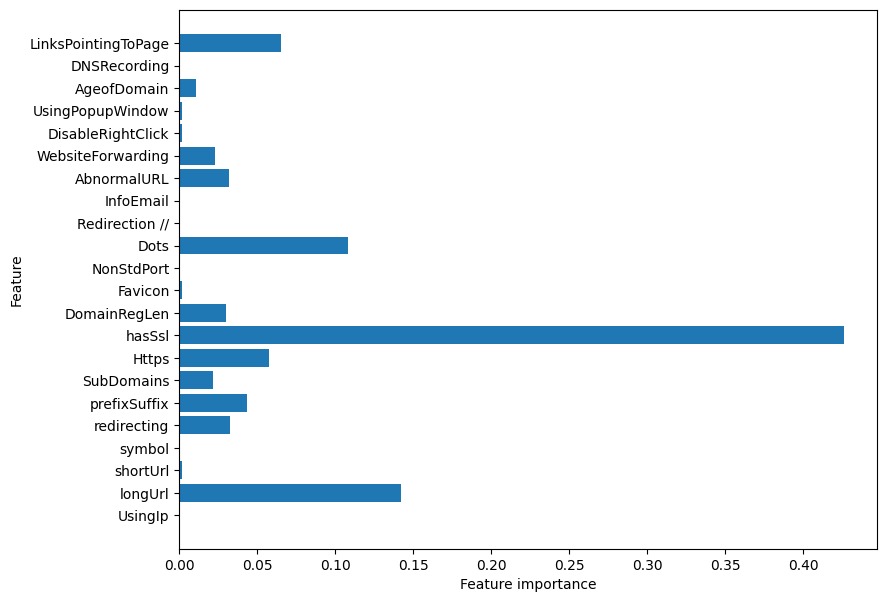

In [127]:
plt.figure(figsize=(9,7))
n_features = X.shape[1]
plt.barh(range(n_features), clf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

Using the trained model to make predictions on the test set and calculating the accuracy of the model

In [128]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

Computing the confusion matrix

In [129]:
cf_matrix = confusion_matrix(y_test, y_pred)


Ploting confusion matrix

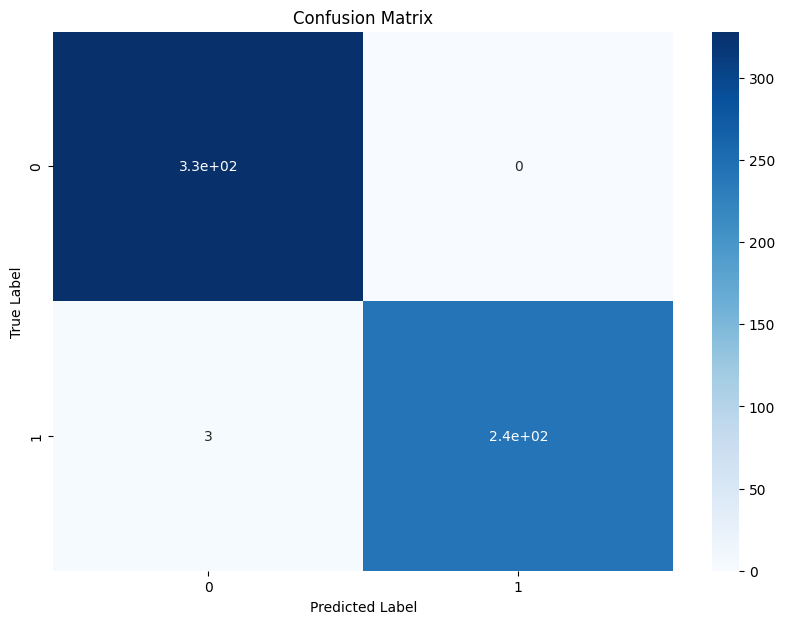

In [130]:
plt.figure(figsize=(10,7))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

Listing the accurary of trained model

In [131]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.48%


Saving the trained model and scaler into one pickle file

In [132]:
with open('trained_model_and_scaler.pkl', 'wb') as f:
    pickle.dump((clf, scaler), f)